In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys

In [2]:
MINI_DATASET_SOURCE ="/home/arun/learn/tensorflow_certification/datasets/food_101/mini_10/"
CATEGORY =["train", "test"]

train_dir = os.path.join(MINI_DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(MINI_DATASET_SOURCE, CATEGORY[1])

tf.random.set_seed(42)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 batch_size=32,
                                                                 label_mode="categorical",
                                                                 image_size=(224, 224)
                                                                 )
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 batch_size=32,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224))

Found 1200 files belonging to 16 classes.


2022-01-21 16:18:59.837475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 16:18:59.848139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 16:18:59.848708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 16:18:59.850036: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 4000 files belonging to 16 classes.


Model: "efficientnetb0_model_0_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                                                                 
Total params: 4,070,067
Trainable params: 20,496
Non-trainable params: 4,049,571
_________________________________________________________________


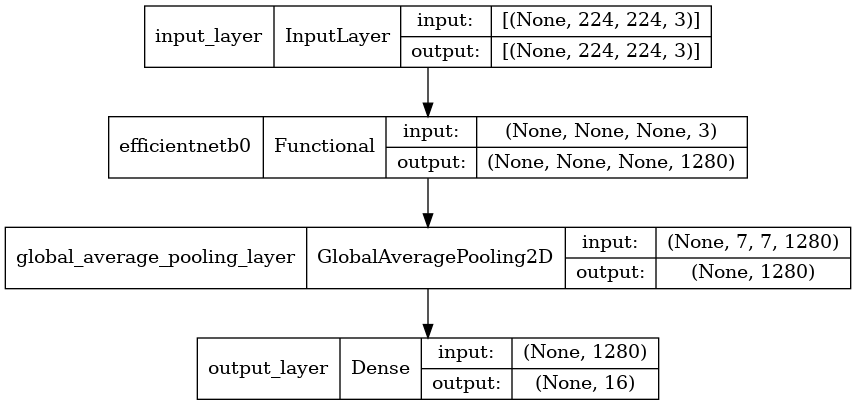

In [3]:
# Get the features from the efficientNet b0 model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# then build the input, other layers
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
# normalizing the data as a layer
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs_)
input_layer = base_model(inputs)
# pool the outputs
global_pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(input_layer)
# activation layer
outputs = tf.keras.layers.Dense(units=16, activation="softmax",name="output_layer")(global_pooling_layer)
# model definition
model_0 = tf.keras.Model(inputs=inputs, outputs=outputs, name="efficientnetb0_model_0_fv")


model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_0.summary()
tf.keras.utils.plot_model(model_0, show_shapes=True)

In [3]:
def create_tensorboard_callback(experiment_name, model_name):
    log_dir = os.path.join("model_logs", str(experiment_name),
                           str(model_name), dt.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"[create_tensorboard_callback] The log dir for tensorboard is : {log_dir}")
    return tensorboard_callback

In [5]:
history_model_0 = model_0.fit(train_data,
                              epochs=5,
                              callbacks=[create_tensorboard_callback("food_vision", "efficientnetb0_model_0_fv")],
                              validation_data=valid_data,
                              steps_per_epoch=len(train_data),
                              validation_steps=len(valid_data))

[create_tensorboard_callback] The log dir for tensorboard is : model_logs/food_vision/efficientnetb0_model_0_fv/20220121-161925
Epoch 1/5


/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
2022-01-21 16:19:32.879780: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8202


38/38 [==============================] - 36s 683ms/step - loss: 2.2038 - accuracy: 0.3900 - val_loss: 1.5193 - val_accuracy: 0.6873
Epoch 2/5
38/38 [==============================] - 24s 649ms/step - loss: 1.2770 - accuracy: 0.7225 - val_loss: 1.0440 - val_accuracy: 0.7675
Epoch 3/5
38/38 [==============================] - 26s 693ms/step - loss: 0.9426 - accuracy: 0.7925 - val_loss: 0.8648 - val_accuracy: 0.7918
Epoch 4/5
38/38 [==============================] - 26s 692ms/step - loss: 0.7604 - accuracy: 0.8367 - val_loss: 0.7719 - val_accuracy: 0.8043
Epoch 5/5
38/38 [==============================] - 27s 713ms/step - loss: 0.6563 - accuracy: 0.8575 - val_loss: 0.7132 - val_accuracy: 0.8163


Text(0.5, 0, 'Epochs')

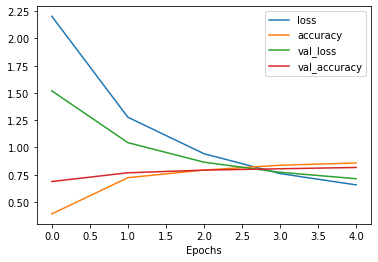

In [6]:
pd.DataFrame(history_model_0.history).plot()
plt.xlabel("Epochs")

In [7]:
# Model 1 with 1% of data
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/mini_1/"
CATEGORY = ["train", "test"]
train_dir = os.path.join(DATASET_SOURCE, CATEGORY[0])
test_dir = os.path.join(DATASET_SOURCE, CATEGORY[1])


tf.random.set_seed(42)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 batch_size=32,
                                                                 image_size=(224, 224),
                                                                 label_mode="categorical",
                                                            )
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 batch_size=32,
                                                                 image_size=(224, 224),
                                                                 label_mode="categorical")


Found 112 files belonging to 16 classes.
Found 4000 files belonging to 16 classes.


Model: "efficientnetb0_model_1_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, None, 3)     0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                                                                 
Total params: 4,070,067
Trainable params:

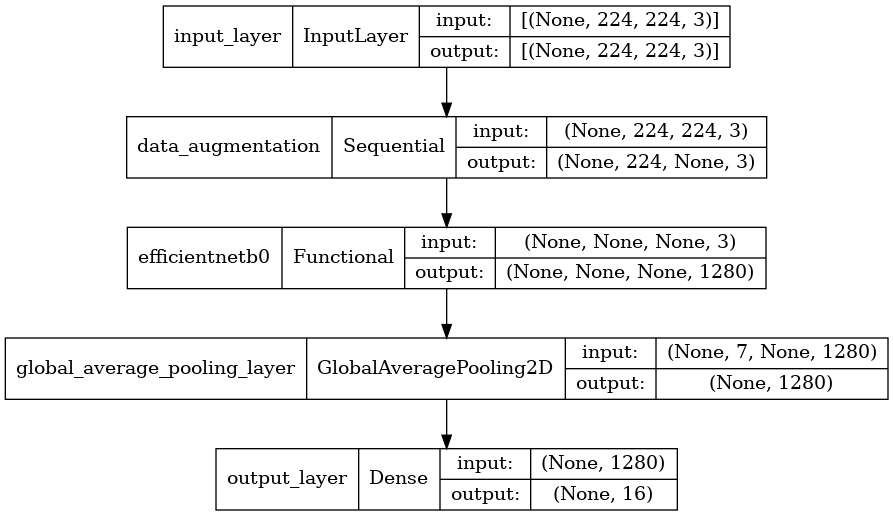

In [9]:
# Get the feature vectors from a existing model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)# no need for the top layer
base_model.trainable = False # no need to train

# input layer for the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# Data augmentation
data_augmentation = tf.keras.Sequential(layers=[
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2),
    # tf.keras.layers.Rescaling(scale=1./255)
    # resclaing already present as a part of efficentnet
], name="data_augmentation")
preprocessing_layer = data_augmentation(inputs)

layer_2 = base_model(preprocessing_layer, training=False)

global_pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(layer_2)

outputs = tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer")(global_pooling_layer)

model_1 = tf.keras.Model(inputs=inputs, outputs=outputs, name="efficientnetb0_model_1_fv")
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_1.summary()
tf.keras.utils.plot_model(model=model_1, show_shapes=True)

In [10]:
history_model1 = model_1.fit(train_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                            validation_steps=len(valid_data),
                             validation_data=valid_data,
                             callbacks=[create_tensorboard_callback("food_vision","efficientnetb0_model_1_fv")])

[create_tensorboard_callback] The log dir for tensorboard is : model_logs/food_vision/efficientnetb0_model_1_fv/20220121-165358
Epoch 1/5


/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4/4 [==============================] - 32s 8s/step - loss: 2.9065 - accuracy: 0.0625 - val_loss: 2.7078 - val_accuracy: 0.1007
Epoch 2/5
4/4 [==============================] - 23s 7s/step - loss: 2.6087 - accuracy: 0.1964 - val_loss: 2.5487 - val_accuracy: 0.1845
Epoch 3/5
4/4 [==============================] - 26s 8s/step - loss: 2.3667 - accuracy: 0.3214 - val_loss: 2.4093 - val_accuracy: 0.2822
Epoch 4/5
4/4 [==============================] - 21s 7s/step - loss: 2.0987 - accuracy: 0.5179 - val_loss: 2.2834 - val_accuracy: 0.3650
Epoch 5/5
4/4 [==============================] - 42s 14s/step - loss: 1.9108 - accuracy: 0.6696 - val_loss: 2.1645 - val_accuracy: 0.4322


Text(0.5, 0, 'Epochs')

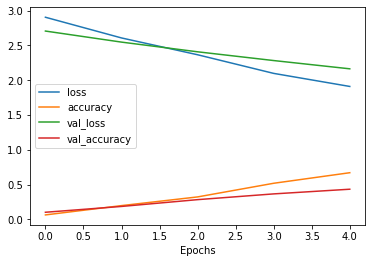

In [11]:
pd.DataFrame(history_model1.history).plot()
plt.xlabel("Epochs")

In [19]:
# 10% data, data augmentation
DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/mini_10/"
train_dir = os.path.join(DATASET_SOURCE, "train")
test_dir = os.path.join(DATASET_SOURCE, "test")

tf.random.set_seed(273)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224,224),
                                                                 batch_size=32)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=(224, 224),
                                                                 batch_size=32)
# fetch pretrained model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create input shapes
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
# preprocess the input
data_augmentation = tf.keras.Sequential(layers=[
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(factor=0.2),
    # tf.keras.layers.RandomWidth(factor=0.2),
    # tf.keras.layers.RandomHeight(factor=0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2),
], name="data_augmentation")
preprocess_layer = data_augmentation(inputs)
# preprocessed layer as the input
layer_2 = base_model(preprocess_layer, training=False )
# average pooling to fetch the feature vectors
pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(layer_2)
# outputs
outputs = tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer")(pooling_layer)
# build model
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="efficientnetb0_model_2_fv")
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.summary()

history_model2 = model_2.fit(train_data,
                             validation_data=valid_data,
                             epochs=10,
                             steps_per_epoch=len(train_data),
                             validation_steps=len(valid_data),
                             callbacks=[create_tensorboard_callback("food_vision",
                                                                    "efficientnetb0_model_2_fv")]
                            )

Found 1200 files belonging to 16 classes.
Found 4000 files belonging to 16 classes.
Model: "efficientnetb0_model_2_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                       

In [31]:
# 10% data, unfreeze top 10 layers
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=(224, 224))
valid_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=(224, 224))

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
data_augmentataion = tf.keras.Sequential(layers=[
    tf.keras.layers.RandomRotation(factor=0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2),
    tf.keras.layers.RandomWidth(factor=0.2),
    tf.keras.layers.RandomHeight(factor=0.2),
], name="data_augmentaion")
preprocessing_layer = data_augmentataion(inputs)

layer_2 = base_model(preprocessing_layer, training=False)

pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(layer_2)
outputs = tf.keras.layers.Dense(units=16,
                                activation="softmax",
                                name="output_layer")(pooling_layer)


model_3 = tf.keras.Model(inputs=inputs, outputs=outputs, name="efficientnetb0_model_3_fv")

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.summary()
history_model3 = model_3.fit(train_data,
                             validation_data=valid_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_steps=len(valid_data),
                             callbacks=[create_tensorboard_callback("food_vision", "efficientnetb0_model_3_fv")])

Found 1200 files belonging to 16 classes.
Found 4000 files belonging to 16 classes.
Model: "efficientnetb0_model_3_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  (None, None, None, 3)    0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                       

/home/arun/learn/tensorflow_certification/venv/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


38/38 [==============================] - 34s 771ms/step - loss: 2.3080 - accuracy: 0.3375 - val_loss: 1.6583 - val_accuracy: 0.6532
Epoch 2/5
38/38 [==============================] - 29s 759ms/step - loss: 1.5328 - accuracy: 0.6458 - val_loss: 1.1816 - val_accuracy: 0.7337
Epoch 3/5
38/38 [==============================] - 27s 716ms/step - loss: 1.1873 - accuracy: 0.7067 - val_loss: 0.9802 - val_accuracy: 0.7567
Epoch 4/5
38/38 [==============================] - 27s 731ms/step - loss: 1.0251 - accuracy: 0.7467 - val_loss: 0.8833 - val_accuracy: 0.7645
Epoch 5/5
38/38 [==============================] - 27s 717ms/step - loss: 0.9241 - accuracy: 0.7683 - val_loss: 0.8229 - val_accuracy: 0.7692


In [32]:
"""
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)
"""
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])
model_3.summary()

Model: "efficientnetb0_model_3_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaion (Sequentia  (None, None, None, 3)    0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                                                                 
Total params: 4,070,067
Trainable params:

In [34]:
history_model3_alt = model_3.fit(train_data,
                             validation_data=valid_data,
                             epochs=10,
                             initial_epoch=history_model3.epoch[-1],
                             steps_per_epoch=len(train_data),
                             validation_steps=len(valid_data),
                             callbacks=[create_tensorboard_callback("food_vision", "efficientnetb0_model_3_fv")])

[create_tensorboard_callback] The log dir for tensorboard is : model_logs/food_vision/efficientnetb0_model_3_fv/20220121-195742
Epoch 5/10
38/38 [==============================] - 36s 802ms/step - loss: 0.7675 - accuracy: 0.7833 - val_loss: 0.7012 - val_accuracy: 0.7715
Epoch 6/10
38/38 [==============================] - 31s 818ms/step - loss: 0.6508 - accuracy: 0.8050 - val_loss: 0.6945 - val_accuracy: 0.7725
Epoch 7/10
38/38 [==============================] - 30s 790ms/step - loss: 0.5744 - accuracy: 0.8208 - val_loss: 0.6544 - val_accuracy: 0.7910
Epoch 8/10
38/38 [==============================] - 29s 778ms/step - loss: 0.5304 - accuracy: 0.8392 - val_loss: 0.6581 - val_accuracy: 0.7920
Epoch 9/10
38/38 [==============================] - 30s 789ms/step - loss: 0.4867 - accuracy: 0.8508 - val_loss: 0.6633 - val_accuracy: 0.7905
Epoch 10/10
38/38 [==============================] - 29s 776ms/step - loss: 0.4251 - accuracy: 0.8692 - val_loss: 0.6223 - val_accuracy: 0.8037


Text(0.5, 0, 'epochs')

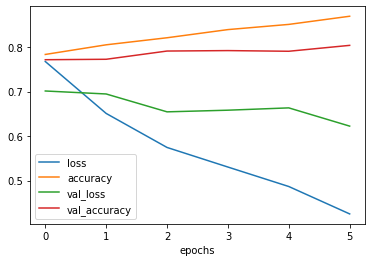

In [36]:
pd.DataFrame(history_model3_alt.history).plot()
plt.xlabel("epochs")

In [5]:
# model 4 : all the data (100%)

DATASET_SOURCE = "/home/arun/learn/tensorflow_certification/datasets/food_101/mini/"
train_dir = os.path.join(DATASET_SOURCE, "train")
test_dir = os.path.join(DATASET_SOURCE, "test")


tf.random.set_seed(273)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 batch_size=32,
                                                                 image_size=(224,224),
                                                                 label_mode="categorical")
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 batch_size=32,
                                                                 image_size=(224, 224),
                                                                 label_mode="categorical")

# first train the model, then fine tune it
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
data_augmentation = tf.keras.Sequential(layers=[
    tf.keras.layers.RandomRotation(factor=0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2),
    tf.keras.layers.RandomWidth(factor=0.2),
    tf.keras.layers.RandomHeight(factor=0.2),
], name="data_augmentation")

preprocessing_layer = data_augmentation(inputs)
layer_2 = base_model(preprocessing_layer, training=False)
pooling_layer = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(layer_2)
outputs = tf.keras.layers.Dense(units=16, activation="softmax", name="output_layer")(pooling_layer)

model_4 = tf.keras.Model(inputs=inputs, outputs=outputs, name="efficientnetb0_model_4_fv")

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_4.summary()

history_model_4 = model_4.fit(train_data, 
                             validation_data=valid_data,
                             epochs=5,
                             steps_per_epoch=len(train_data),
                             validation_steps=int(0.25 * len(valid_data)),
                             callbacks=[create_tensorboard_callback("food_vision", "efficientnetb0_model_4_fv")])

Found 12000 files belonging to 16 classes.
Found 4000 files belonging to 16 classes.
Model: "efficientnetb0_model_4_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                      

2022-01-22 11:18:22.308713: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8202


 19/375 [>.............................] - ETA: 4:49 - loss: 2.6573 - accuracy: 0.1464

2022-01-22 11:18:41.978204: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-22 11:18:41.978311: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 68/375 [====>.........................] - ETA: 3:23 - loss: 2.0960 - accuracy: 0.4145

2022-01-22 11:19:11.767444: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-22 11:19:11.767565: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 71/375 [====>.........................] - ETA: 3:22 - loss: 2.0678 - accuracy: 0.4269

2022-01-22 11:19:13.899951: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-22 11:19:13.900060: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


 81/375 [=====>........................] - ETA: 3:10 - loss: 1.9958 - accuracy: 0.4498

2022-01-22 11:19:19.173384: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-22 11:19:19.173509: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


129/375 [=========>....................] - ETA: 2:28 - loss: 1.7434 - accuracy: 0.5223

2022-01-22 11:19:44.744503: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-22 11:19:44.744623: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


375/375 [==============================] - 213s 535ms/step - loss: 1.2674 - accuracy: 0.6467 - val_loss: 0.6025 - val_accuracy: 0.8246
Epoch 2/5
375/375 [==============================] - 144s 384ms/step - loss: 0.8296 - accuracy: 0.7549 - val_loss: 0.4913 - val_accuracy: 0.8448
Epoch 3/5
375/375 [==============================] - 126s 335ms/step - loss: 0.7425 - accuracy: 0.7763 - val_loss: 0.4476 - val_accuracy: 0.8659
Epoch 4/5
375/375 [==============================] - 109s 291ms/step - loss: 0.6973 - accuracy: 0.7917 - val_loss: 0.4427 - val_accuracy: 0.8690
Epoch 5/5
375/375 [==============================] - 95s 253ms/step - loss: 0.6571 - accuracy: 0.7999 - val_loss: 0.4546 - val_accuracy: 0.8700


In [6]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])
model_4.summary()

Model: "efficientnetb0_model_4_fv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output_layer (Dense)        (None, 16)                20496     
                                                                 
Total params: 4,070,067
Trainable params:

In [7]:
history_model_4_fine_tuned = model_4.fit(train_data,
                                         validation_data=valid_data,
                                         epochs=10,
                                         initial_epoch=history_model_4.epoch[-1],
                                         steps_per_epoch=len(train_data),
                                         validation_steps=len(valid_data),
                                         callbacks=[create_tensorboard_callback("food_vision", "efficientnetb0_model_4_fv_fine")])

[create_tensorboard_callback] The log dir for tensorboard is : model_logs/food_vision/efficientnetb0_model_4_fv_fine/20220122-112941
Epoch 5/10
375/375 [==============================] - 115s 286ms/step - loss: 0.6112 - accuracy: 0.8136 - val_loss: 0.4046 - val_accuracy: 0.8717
Epoch 6/10
375/375 [==============================] - 97s 258ms/step - loss: 0.5438 - accuracy: 0.8373 - val_loss: 0.4012 - val_accuracy: 0.8760
Epoch 7/10
375/375 [==============================] - 96s 256ms/step - loss: 0.5042 - accuracy: 0.8418 - val_loss: 0.3728 - val_accuracy: 0.8832
Epoch 8/10
375/375 [==============================] - 92s 245ms/step - loss: 0.4497 - accuracy: 0.8600 - val_loss: 0.3783 - val_accuracy: 0.8798
Epoch 9/10
375/375 [==============================] - 89s 238ms/step - loss: 0.4141 - accuracy: 0.8751 - val_loss: 0.3734 - val_accuracy: 0.8830
Epoch 10/10
375/375 [==============================] - 86s 229ms/step - loss: 0.3866 - accuracy: 0.8796 - val_loss: 0.3948 - val_accuracy: 0.

In [8]:
model_4.evaluate(valid_data)

125/125 [==============================] - 19s 147ms/step - loss: 0.3948 - accuracy: 0.8750


[0.39476245641708374, 0.875]

In [9]:
history_model_4_fine_tuned